# Grocery Store Model

In [6]:
# Import Libraries
import sys
import argparse
from datetime import datetime
import math

import pandas as pd
from numpy.random import default_rng, uniform
import simpy
from pathlib import Path
from IPython.display import Image

## About the model
### Overview
This project uses the SimPy environment to model a basic grocery store. 
The entities for this model are customers. The model maps the customers’ trip through the grocery store, records key time stamps, and performs some basic preprocessing. 
### Customers Arrive and Get A Cart
Customers arrive according to an exponential distribution. Once a customer enters the store, they request a cart. If a cart is unavailable, the customer must wait. This time it takes customers to pull a cart is uniform distribution. The customer keeps the cart resource until they exit the system.
Each customer has a set time it takes them to decide pick one item and walk to the next location. This is based on a normal distribution. The default estimates for this distribution are logical but not based on actual data. 
### The Departments
Customers pick items from three departments. The number of items from each department is governed by a normal distribution. The distribution is post processed to round to the nearest integer and floor negative numbers at zero.  
* Produce
    * The total time in the produce department is the product of the time it takes to pick an item and the number of produce items. 
* Butcher
	* Only a limited percentage of customers need to see the butcher. If a customer doesn’t need to see the butcher, they skip this step and go directly to produce. Customers that do need to see the butcher request the resource. If one is unavailable, they must wait. The time the butcher requires to process the an item is a log-normal distribution. The total time at the butcher station is the sum of the time it takes a customer to pick and a butcher to process an item times the number of items. The mean of the number of items from the butcher is the lowest of all three departments.
* Pantry
    * The pantry department is very similar to produce. There are no constrained resources. The mean is slightly higher than the produce department. The time in the pantry department is the product of number of items and the time it takes to pick one item.
### The Checkout
After customers finish selecting all their items, they go request a cashier to checkout. If a cashier is unavailable, the customer must wait. The cashier’s processing time per item is a log-normal distribution. The scanning time per item is unique for each customer. I struggled to find default statistics to make this distribution logical, so I added it to the summary statistics. My initial attempt had some cashiers spending five minutes per item. [This site]( https://homepage.divms.uiowa.edu/~mbognar/applets/lognormal.html) from the University of Iowa allowed me to try several distributions until I found the correct probability. A negative mean for the log-normal cashier distribution was key. The time at the cashier is the product if total number of items and the cashier’s scanning time per item. 
### Exit the System
Once the checkout is complete, the customer releases the cashier and their cart and exits the system.

### Further Extensions
This is just an introductory model of a grocery store. There are several steps this model could take to be more realistic and useful. 
* Change the model to account for customer variations in time of day and day of the week
* Set a mean scanning time for each cashier that holds throughout the model
* Create more departments to add specificity to the model
* Account for restocking needs



## Visualize the Model

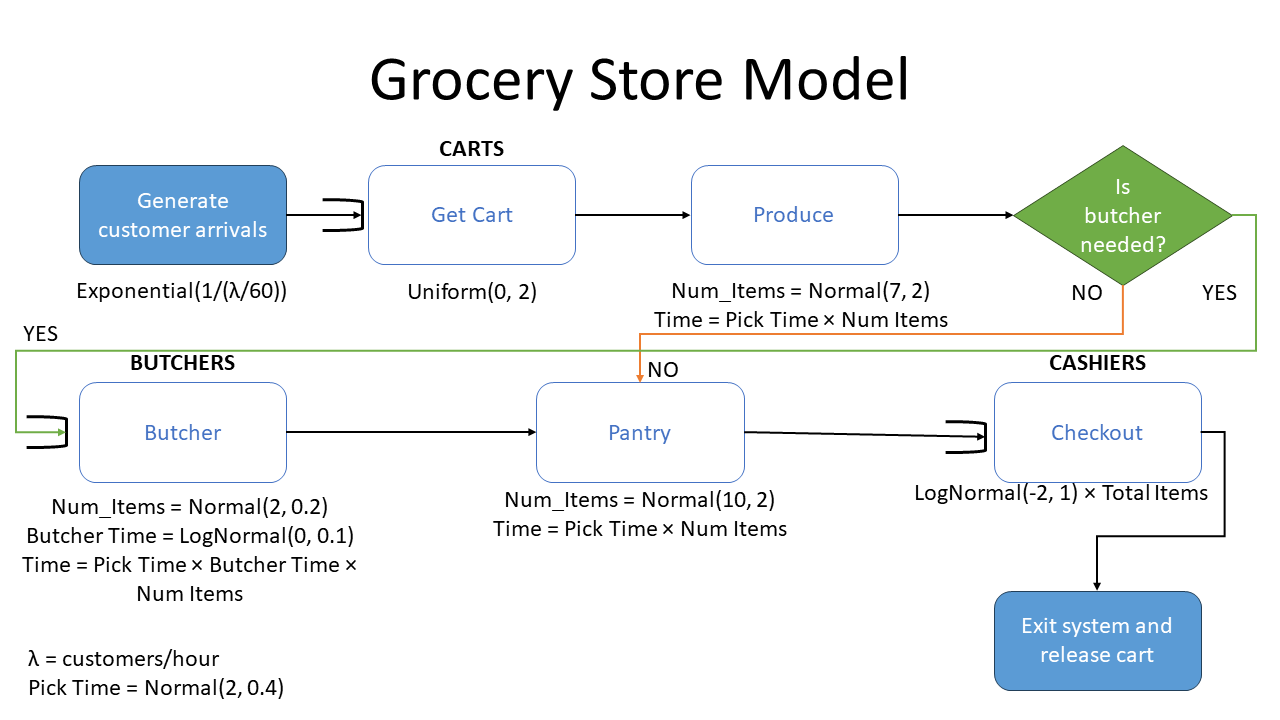

In [8]:
Image("images/Visualize_Model.png")